In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

# <mark>Analyzing Data </mark>

In [3]:
df.shape


(11251, 15)

In [6]:
df.head

<bound method NDFrame.head of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

         

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
#df.drop(['Status', 'unnamed1'], axis = 1, inplace =True)

# <mark>Deleting Null Values </mark>

In [9]:
pd.isnull(df).sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
Status              0
unnamed1            0
dtype: int64

# <mark>Deleting column 'Status' & 'Unnamed1'</mark>

In [12]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace =True)

In [13]:
df.shape

(0, 13)

# <mark> Changing datatype of Amount Column <mark>

In [14]:
df['Amount'] = df['Amount'].astype('int')

In [15]:
df['Amount'].dtypes

dtype('int64')

# <mark> Renaming Column<mark>

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
df.rename(columns = {'Cust_name':'Customer_Name'}, inplace = True)

In [18]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


# <mark> Diwali Sales Analysis: Gender-wise Breakdown<mark>

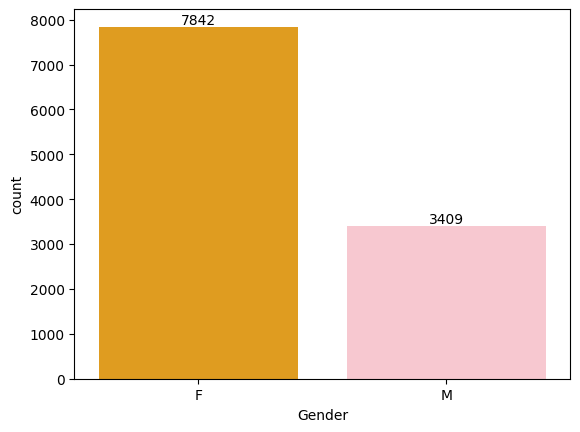

In [6]:
ax = sns.countplot(x ='Gender', data = df, palette = ['orange','pink'], dodge = False, legend = False, hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()    

In [9]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

<Axes: xlabel='Gender', ylabel='Amount'>

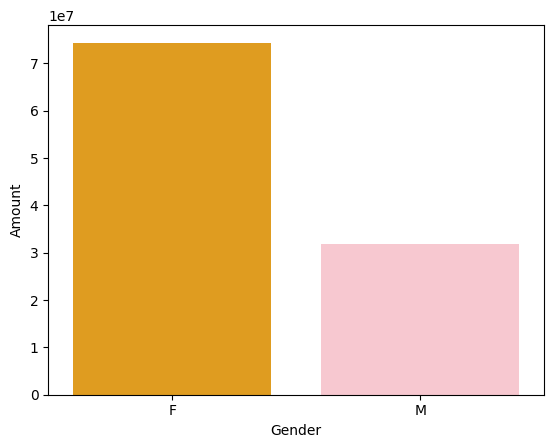

In [10]:
sns.barplot(x='Gender', y ='Amount', data = sales_gen, palette = ['orange','pink'], legend = False , hue = 'Gender')

# From the above two graph, the analysis reveals that females represent the majority of buyers and exhibit higher purchasing power compared to males. This indicates a strong engagement and greater financial contribution from female members.

# <mark> Diwali Sales Analysis: Age-wise Breakdown<mark>


In [12]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

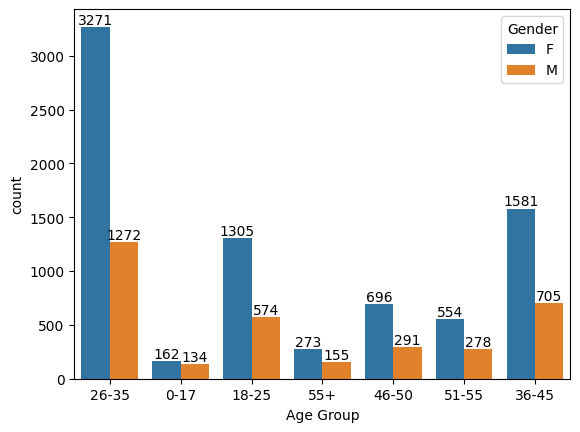

In [8]:
ax = sns.countplot(x = 'Age Group', data = df, hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()    


In [4]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)


<Axes: xlabel='Age Group', ylabel='Amount'>

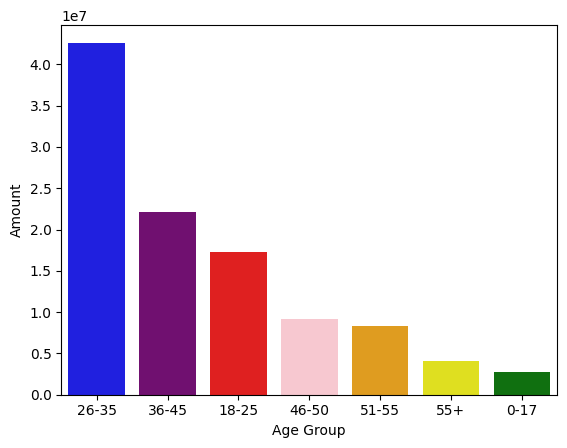

In [9]:
sns.barplot(x= 'Age Group', y = 'Amount', data = sales_age, palette = ['blue', 'purple', 'red' , 'pink' , 'orange', 'yellow', 'green'], 
            hue = 'Age Group', legend = False)


# Based on the two graphs, it is evident that the majority of buyers fall within the age group of 26-35 years and are predominantly female. This demographic trend highlights a key target audience for our Diwali sales project.


# <mark> Diwali Sales Analysis: State-wise Breakdown<mark>


In [20]:
sales_data = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders' ,ascending = False).head(8)


<Axes: xlabel='State', ylabel='Orders'>

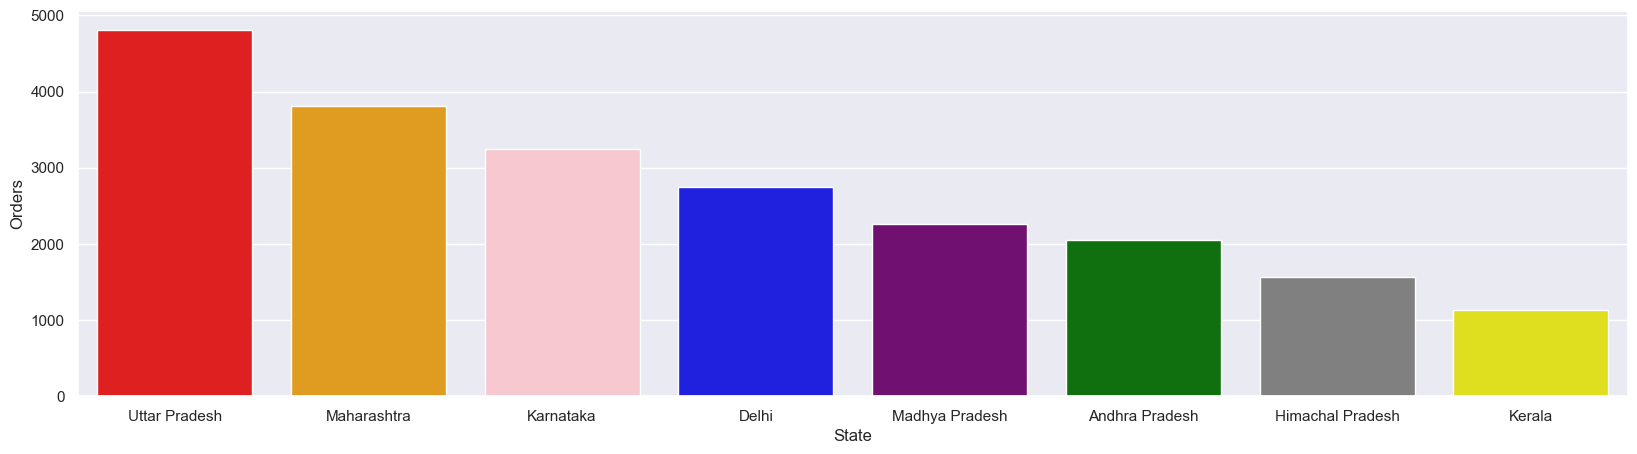

In [27]:
sns.set(rc= {'figure.figsize' : (20,5)})
sns.barplot( x = 'State', y = 'Orders', data = sales_data,
            palette=['Red','Orange','Pink','Blue','Purple', 'Green', 'Grey', 'Yellow'], 
            hue = 'State', legend= False)

# Based on the analysis of the two graphs, it is evident that the majority of orders originate from Uttar Pradesh, Maharashtra, and Karnataka. This insight highlights key regions contributing significantly to our Diwali sales.

# <mark> Diwali Sales Analysis: Marital Status Insights<mark>

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

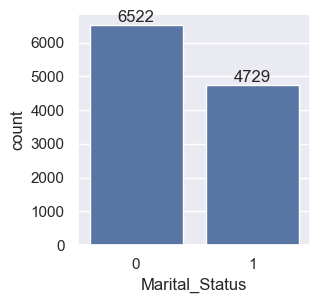

In [34]:
ax = sns.countplot(x = 'Marital_Status', data = df)

sns.set(rc = {'figure.figsize' : (4,3)})
for bars in ax.containers:
    ax.bar_label(bars)

In [35]:
data_couple = df.groupby(['Marital_Status','Gender'],
as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

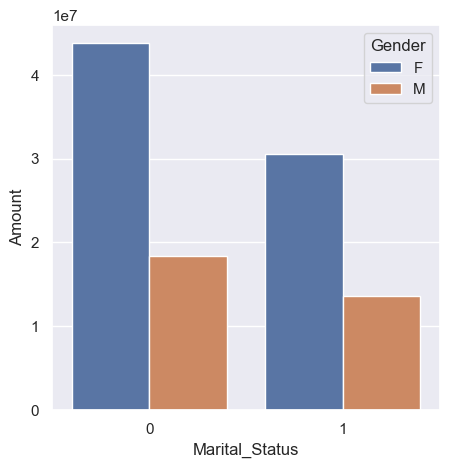

In [40]:
sns.barplot(x= 'Marital_Status', y= 'Amount', data = data_couple, hue = 'Gender')

# From the above two graphs, we can analyze that the majority of buyers are married women. This insight is crucial for tailoring our Diwali sales strategies to better target this demographic.

# <mark> Diwali Sales Analysis: Occupation-wise Insights<mark>

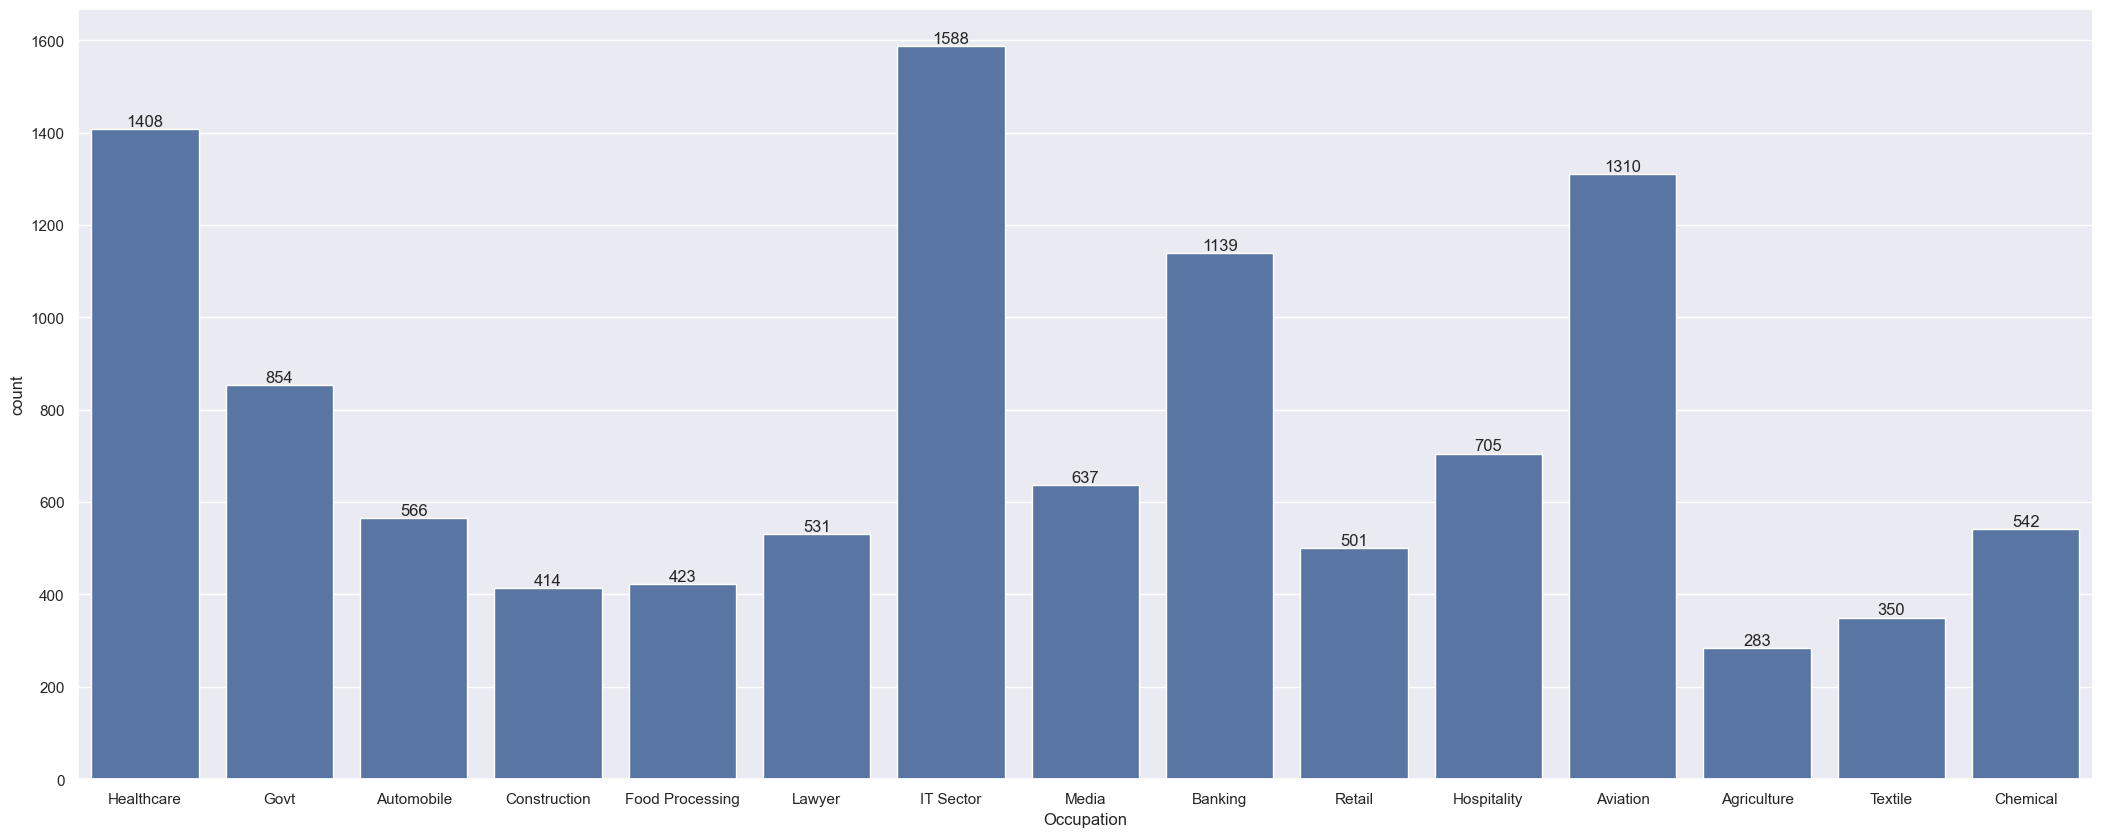

In [58]:
ax = sns.countplot(x = 'Occupation', data = df)
sns.set(rc = {'figure.figsize':(26,5)})
for bars in ax.containers:
    ax.bar_label(bars)

In [49]:
sales_occupation = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values('Amount', ascending= False)

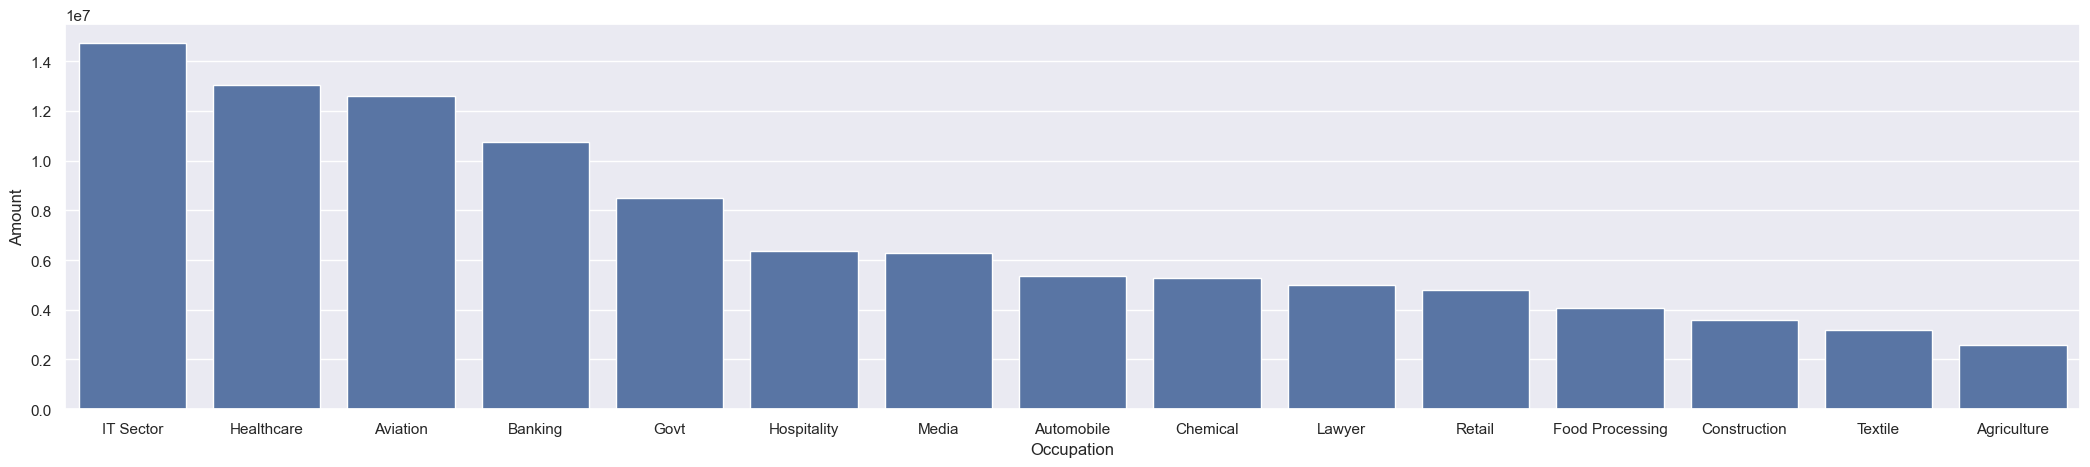

In [59]:
sns.barplot(x= 'Occupation' , y = 'Amount' , data = sales_occupation)
sns.set(rc = {'figure.figsize' :(26,5)})

# From the above two graphs, we can see that most buyers are from the IT, Healthcare, and Aviation sectors, whereas Agriculture and Textile have the fewest buyers. This insight highlights key industries driving our Diwali sales.

# <mark> Diwali Sales Analysis: Product Category-wise Insights<mark>

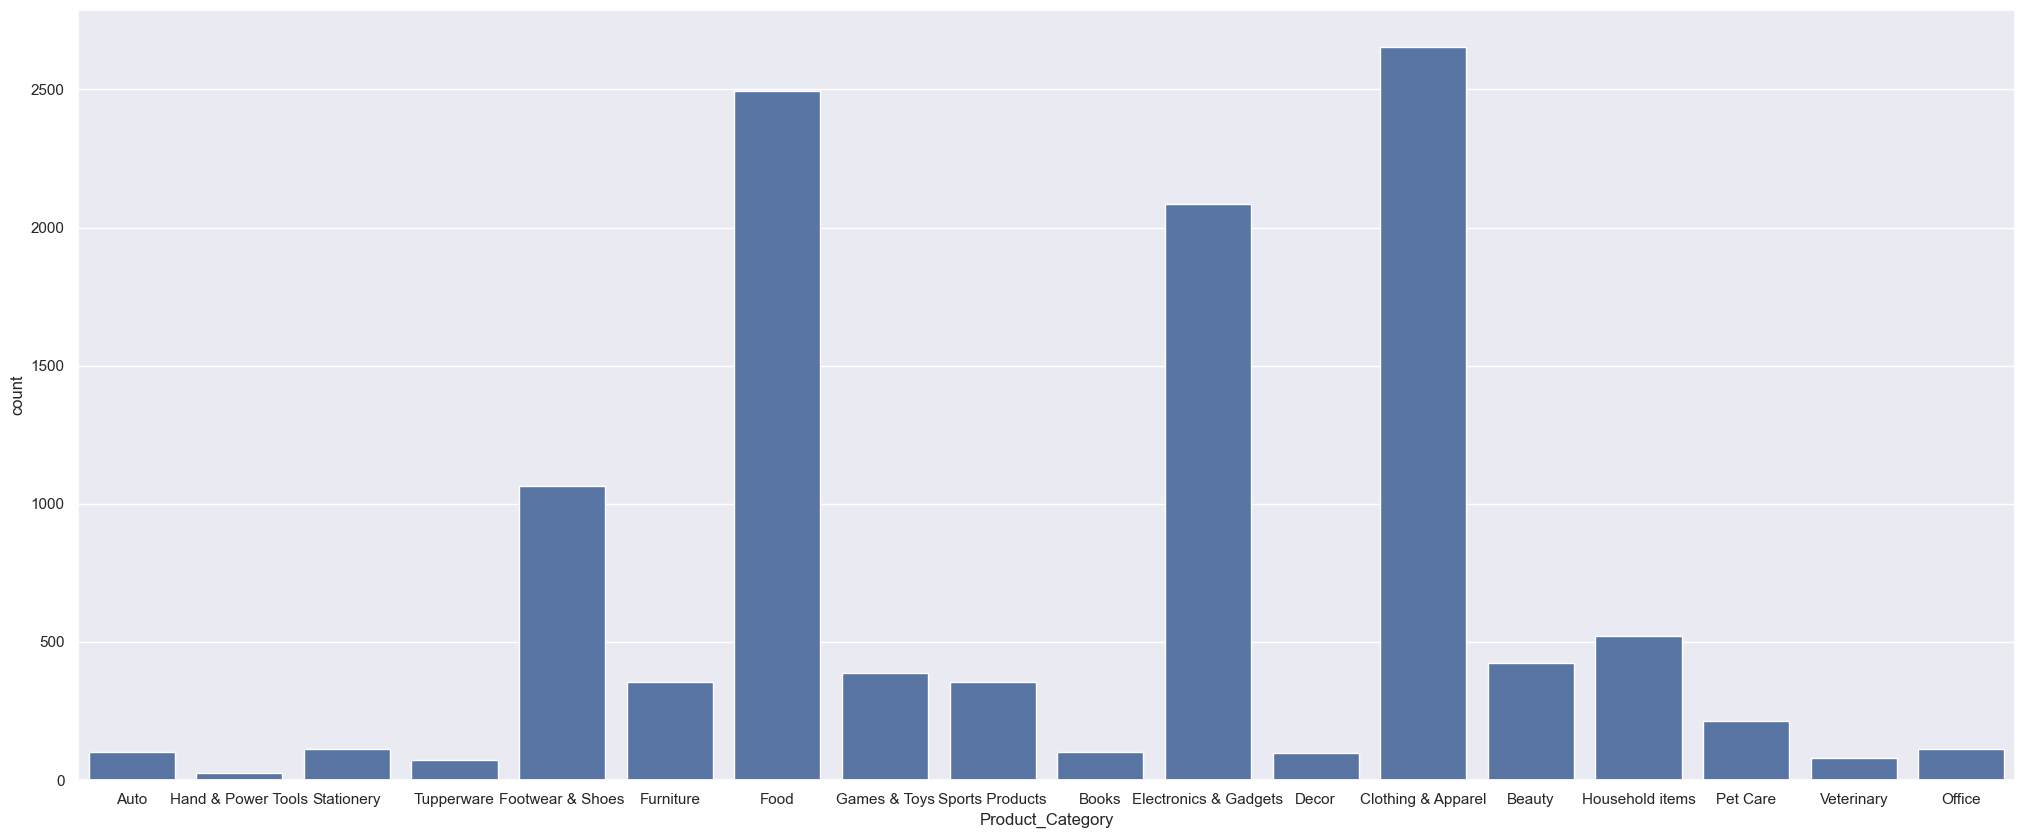

In [72]:
ax = sns.countplot(x = 'Product_Category', data = df)
sns.set(rc= {'figure.figsize':(30,10)})

In [74]:
product_data = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values('Amount', ascending = False)

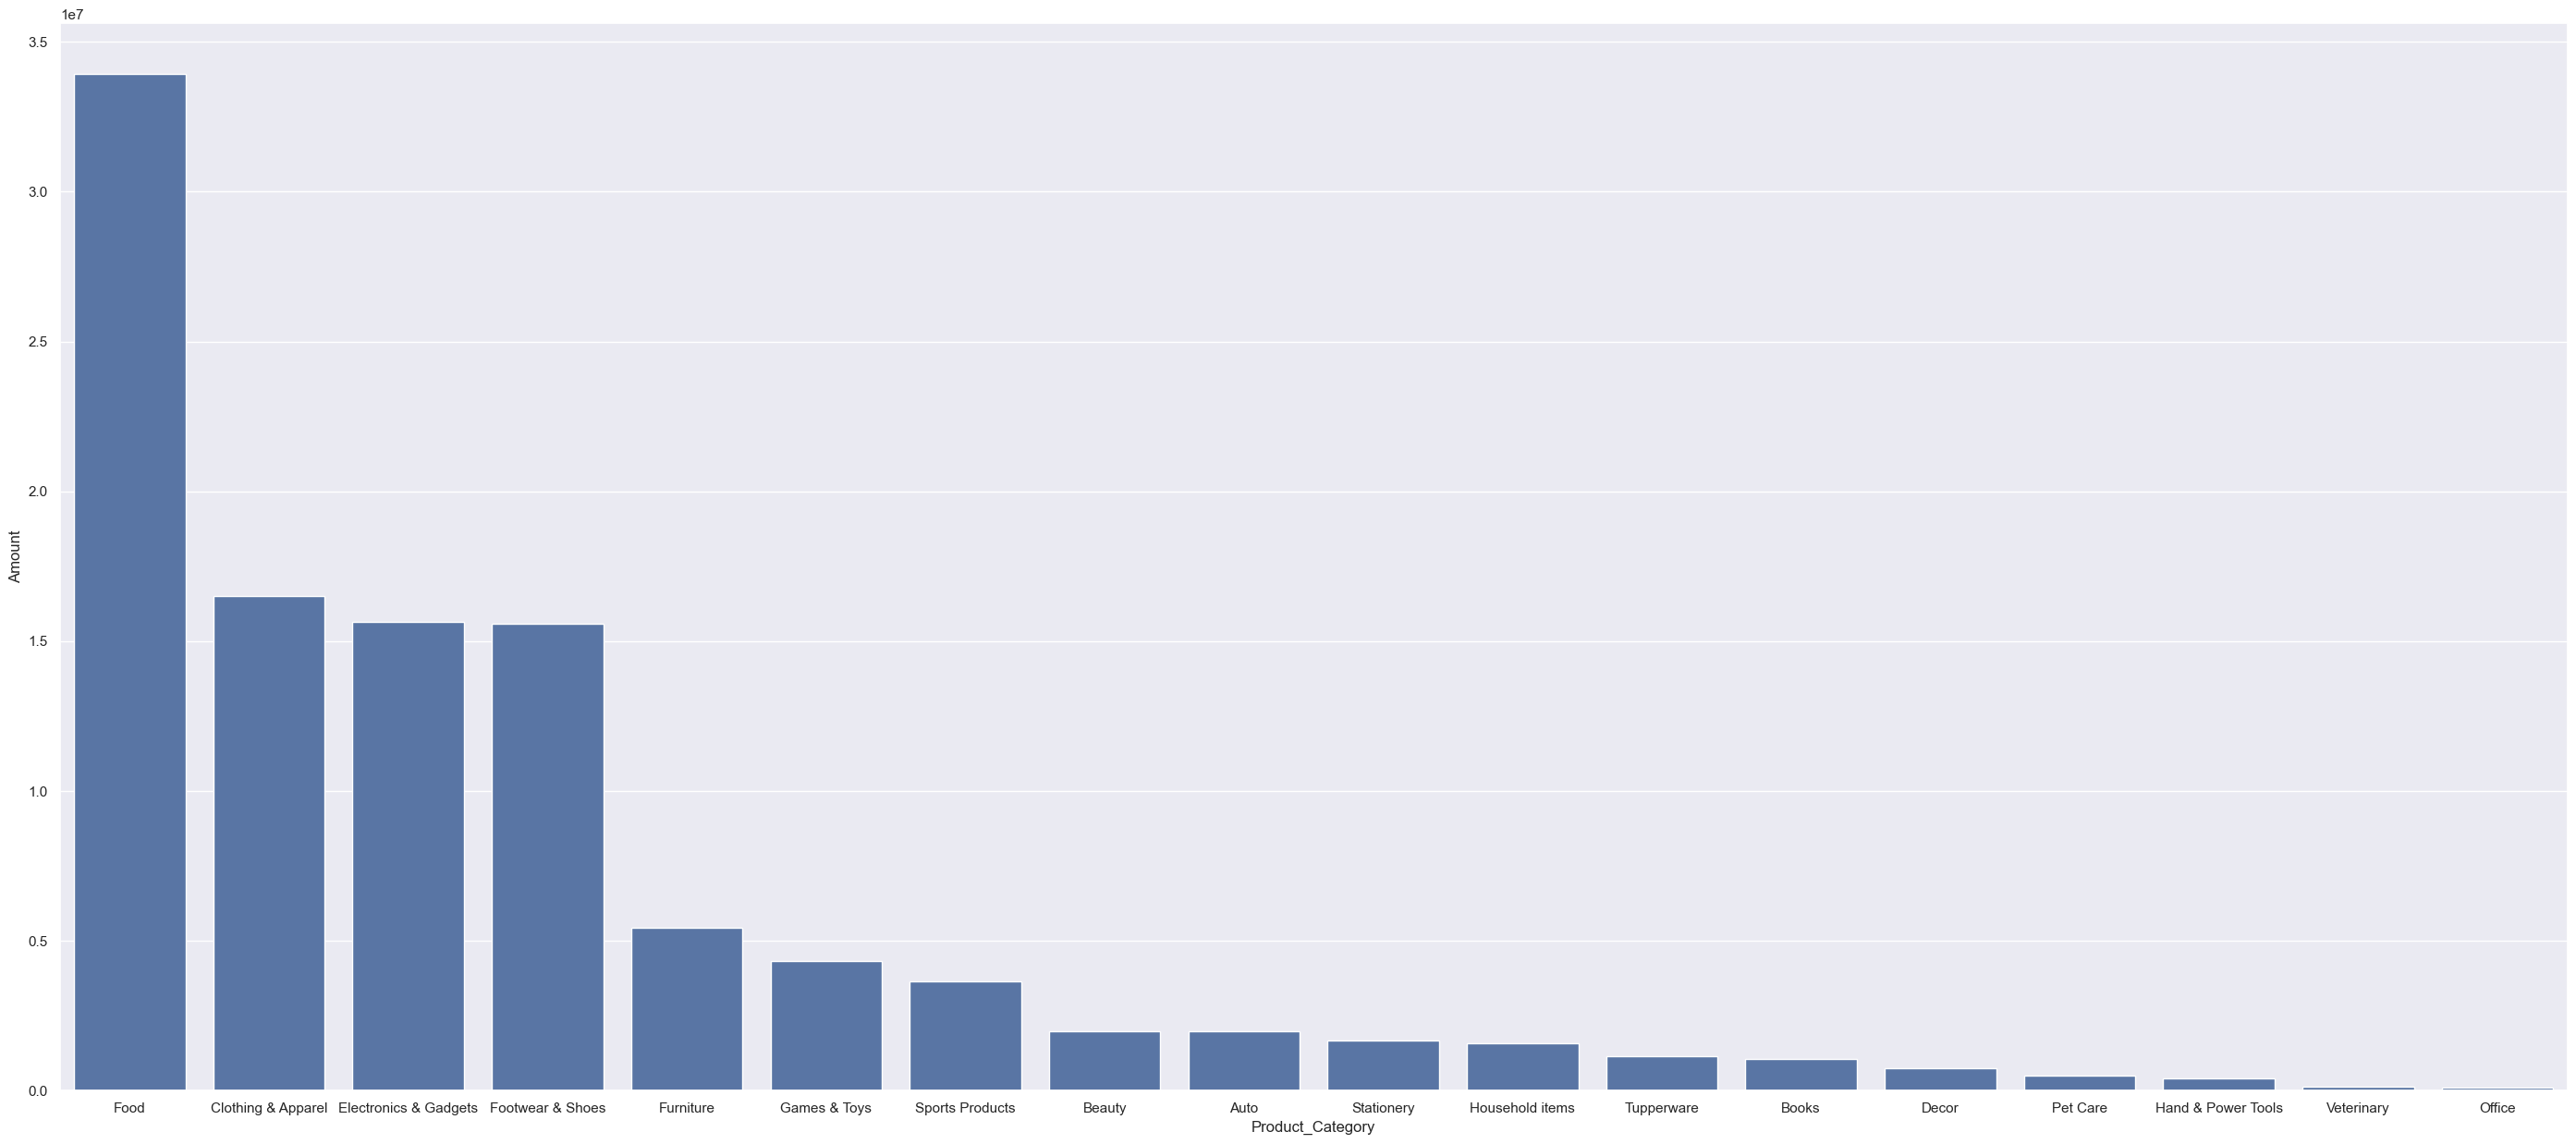

In [86]:
sns.barplot(x = 'Product_Category', y = 'Amount', data = product_data)
sns.set(rc= {'figure.figsize' : (35,15)})

# From the above data, it is evident that the majority of Diwali sales are driven by purchases in the food, clothing, and electronics categories. This trend underscores the high consumer demand for these essential and desirable items during the festive period.

# <mark> Diwali Sales Analysis: Zone-wise Insights<mark>

In [36]:
Eastern = df.loc[(df['Zone'] == "Eastern")].count()
Western = df.loc[(df['Zone'] == "Western")].count()
Northern = df.loc[(df['Zone'] == "Northern")].count()
Southern = df.loc[(df['Zone'] == "Southern")].count()
Central = df.loc[(df['Zone'] == "Central")].count()

In [37]:
l = ["Eastern", "Western", "Northern", "Southern", "Central"]

In [38]:
mlist = [Eastern["Zone"], Western["Zone"], Northern["Zone"], Southern["Zone"], Central["Zone"]]


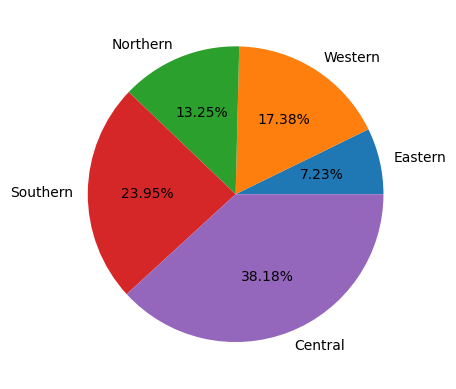

In [39]:
plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.show()

# For the Diwali sales analysis project, it is evident that the majority of sales are concentrated in the central and southern zones, whereas the eastern zone shows the least purchasing activity.
